In [ ]:
!nvidia-smi

Sat Dec 27 10:13:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q datasets

In [ ]:
from transformers import pipeline
from datasets import load_dataset

my_sentiment = pipeline("sentiment-analysis", device = "cuda")
result = my_sentiment("I love you")[0]

print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


label: POSITIVE, with score: 0.9999


In [ ]:
result

{'label': 'POSITIVE', 'score': 0.9998656511306763}

In [8]:
# Name entity Recognition
my_enr = pipeline("ner", device="cuda")
results = my_enr("As an AI-engineer I should review and read many books in the field of Math, Probability and Statistics.")
for en in results:
  print(en)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


{'entity': 'I-MISC', 'score': np.float32(0.76665395), 'index': 3, 'word': 'AI', 'start': 6, 'end': 8}
{'entity': 'I-MISC', 'score': np.float32(0.3707501), 'index': 17, 'word': 'Math', 'start': 70, 'end': 74}
{'entity': 'I-MISC', 'score': np.float32(0.51254886), 'index': 19, 'word': 'Pro', 'start': 76, 'end': 79}
{'entity': 'I-MISC', 'score': np.float32(0.6106815), 'index': 23, 'word': 'Statistics', 'start': 92, 'end': 102}


In [9]:
# image Generation

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

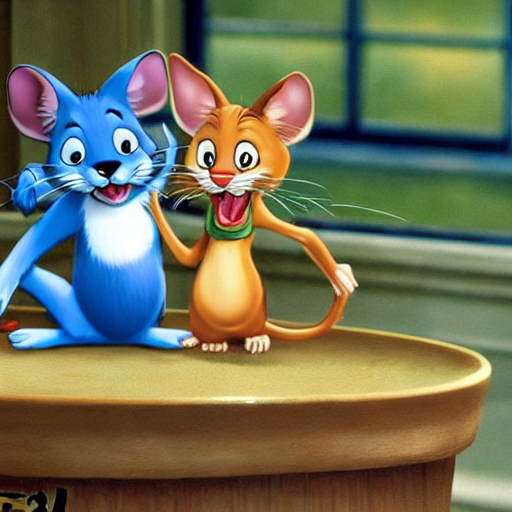

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")
prompt = "tom and Jerry"
image = pipe(prompt=prompt, num_inference_steps=60).images[0]
image

In [2]:
# tokenizer

In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("llava-hf/llava-1.5-7b-hf")

text = "Hello, this is a test for the tokenizer. I just load a random tokenizer from hugging face"

tokens = tokenizer(text)
print(tokens)

{'input_ids': [1, 15043, 29892, 445, 338, 263, 1243, 363, 278, 5993, 3950, 29889, 306, 925, 2254, 263, 4036, 5993, 3950, 515, 298, 688, 3460, 3700], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [11]:
print(f"length of words: {len(text.split())} and length of tokens: {len(tokens['input_ids'])}")

length of words: 17 and length of tokens: 24


In [15]:
words = tokenizer.decode(tokens['input_ids'])
words

'<s> Hello, this is a test for the tokenizer. I just load a random tokenizer from hugging face'